# Creating and analysing the simulated datasets #
Current code includes: 
Number of transcripts: each transcript has its own SNPs, each with their own error rate, and its own mobility status.

Number of SNPs: the number of SNPs per transcript (currently fixed).

Number of replicates: We create 2 homograft files (Nhom1 and Nhom2), and then no_reps heterograft files. 

# Method A #

If a single SNP has a read depth >= min_read_thresh, then it is flagged as being mobile. If 1 or more SNPs are flagged as being mobile, then the transcript is flagged as being mobile.

# Handling SNPs #

Bayes Factors: sum them all (should we point out in the paper that this is a useful advantage of this method?)

Method A: snp_thresh SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

Method B: snp_thres SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

# Handling replicates #

Bayes Factors: Again, very simple. We sum across replicates

Method A: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobile assignment to be given.

Method B: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobiel assigment to be given.

Running Bayes...
Finished!
       N      q  N2_func  mobile     n    N2    SNP  Nhom1  Nhom2  nhom1  \
0   1000  0.001        5   False   1.0   0.0  0_0_0   1000   1000      0   
1   1000  0.002        5   False   2.0   0.0  0_0_1   1000   1000      3   
2   1000  0.003        5   False   5.0   0.0  0_0_2   1000   1000      4   
3   1000  0.004        5   False   8.0   0.0  0_0_3   1000   1000      1   
4   1000  0.005        5   False   8.0   0.0  0_0_4   1000   1000      1   
..   ...    ...      ...     ...   ...   ...    ...    ...    ...    ...   
5   1000  0.006        5    True  39.0  30.0  9_1_5   1000   1000      9   
6   1000  0.007        5    True  37.0  35.0  9_1_6   1000   1000      5   
7   1000  0.008        5    True  48.0  40.0  9_1_7   1000   1000      7   
8   1000  0.009        5    True  54.0  45.0  9_1_8   1000   1000     13   
9   1000  0.010        5    True  55.0  50.0  9_1_9   1000   1000     17   

    nhom2       log10BF condition transcript  Method_A  Meth

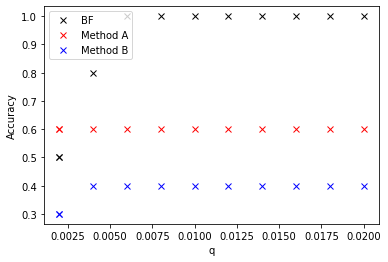

In [2]:
import baymobil as baymob

## Create the datasets. This function creates no_reps .csv files, storing them in the "output" folder. This will delete any previous files, so make sure you have moved anything that you still need.
baymob.simulations.create_simulated_data("q")

## Now, we load in and combine all of the replicate data, according to the above rules
df = baymob.load_data()

## Plot and compare the accuracy (TP + TN) / (TP + TN + FP + FN) of the three different methods on our simulated datasets
baymob.plot_data(df,"q")


,mobile,Method_A,TP_Method_A,TN_Method_A,FP_Method_A,FN_Method_A
29,0,1.0,0,0,0,0
31,0,1.0,0,0,0,0
44,0,1.0,0,0,0,0
45,0,1.0,0,0,0,0
50,0,1.0,0,0,0,0
...,...,...,...,...,...,...
987,4,2.0,1,0,0,0
989,4,2.0,1,0,0,0
990,4,2.0,1,0,0,0
993,4,2.0,1,0,0,0


In [ ]:
df0[["mobile","Method_A"]]

In [2]:
import pandas as pd
df0 = pd.read_csv("output/output0.csv")
df1 = pd.read_csv("output/output1.csv")


In [3]:
df0

,Unnamed: 0,condition,transcript,N,q,N2_func,mobile,n,N2,Nhom1,Nhom2,nhom1,nhom2,log10BF,Method_A,Method_B
0,0,0,0,2000,0.002,10,0,5.0,0.0,2000,2000,3,2,-0.397868,1.0,0.0
1,1,0,1,2000,0.002,10,0,3.0,0.0,2000,2000,3,5,-0.601626,1.0,0.0
2,2,0,2,2000,0.002,10,2,12.0,10.0,2000,2000,1,1,1.148693,1.0,0.0
3,3,0,3,2000,0.002,10,0,2.0,0.0,2000,2000,1,1,-0.300813,1.0,1.0
4,4,0,4,2000,0.002,10,0,1.0,0.0,2000,2000,1,2,-3.301464,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,9,5,2000,0.020,10,2,116.0,100.0,2000,2000,22,15,13.414755,1.0,0.0
96,96,9,6,2000,0.020,10,2,126.0,100.0,2000,2000,25,9,13.406369,1.0,0.0
97,97,9,7,2000,0.020,10,2,118.0,100.0,2000,2000,24,21,12.091402,1.0,0.0
98,98,9,8,2000,0.020,10,0,20.0,0.0,2000,2000,23,32,-0.663091,1.0,0.0


In [4]:
df1

,Unnamed: 0,condition,transcript,N,q,N2_func,mobile,n,N2,Nhom1,Nhom2,nhom1,nhom2,log10BF,Method_A,Method_B
0,0,0,0,2000,0.002,10,0,1.0,0.0,2000,2000,3,2,-3.476904,1.0,0.0
1,1,0,1,2000,0.002,10,0,5.0,0.0,2000,2000,3,5,-0.425824,1.0,0.0
2,2,0,2,2000,0.002,10,2,12.0,10.0,2000,2000,1,1,1.091026,1.0,0.0
3,3,0,3,2000,0.002,10,0,2.0,0.0,2000,2000,1,1,-0.300813,1.0,1.0
4,4,0,4,2000,0.002,10,0,1.0,0.0,2000,2000,1,2,-3.000650,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,9,5,2000,0.020,10,2,130.0,100.0,2000,2000,22,15,16.699139,1.0,0.0
96,96,9,6,2000,0.020,10,2,121.0,100.0,2000,2000,25,9,12.278595,1.0,0.0
97,97,9,7,2000,0.020,10,2,123.0,100.0,2000,2000,24,21,13.268595,1.0,0.0
98,98,9,8,2000,0.020,10,0,23.0,0.0,2000,2000,23,32,-0.618915,1.0,0.0
